### National Accounts Version

In [1]:
# Import libraries / preliminaries
%config Completer.use_jedi = False
import pandas as pd
import requests
import io, itertools, time
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
plt.rc('axes', edgecolor='white')
plt.rc('ytick',labelsize=8)
plt.rc('xtick',labelsize=8)
plt.rc('legend',fontsize=9)

# Function to retrieve a series from FRED
def fred_df(series):
    url = f'http://research.stlouisfed.org/fred2/series/{series}/downloaddata/{series}.csv'
    df = pd.read_csv(url, index_col='DATE', parse_dates=True, na_values=['.'])
    return df.rename({'VALUE': series}, axis=1)

In [11]:
d = {'PCECA': 'PCE', 'A033RC1A027NBEA': 'COE', 'A067RC1A027NBEA': 'DPI', 
     'A041RC1A027NBEA': 'Prop', 'W210RC1A027NBEA': 'ASSET', 
     'A065RC1A027NBEA': 'PI', 'A071RC1A027NBEA': 'SAVE'}

In [68]:
df = pd.DataFrame()
for s, name in d.items():
    df[name] = fred_df(s)[s]
df['Market Income'] = df[['COE', 'ASSET', 'Prop']].sum(axis=1)
df['Other Income & Taxes (Net)'] = df['DPI'] - df['Market Income']
df['Saving'] = -df['SAVE']

In [69]:
ylist = [(1972, 1983), (1989, 2016), (2016, 2019), (2019, 2021), 
         (2021, 2022)]
res = {}
for year1, year2 in ylist:
    adj = year2 - year1
    yt1, yt2 = f'{year1}-01-01', f'{year2}-01-01'
    dt = f'{year1}-\n{year2}'
    ch = (df.loc[yt2].subtract(df.loc[yt1], axis=0))
    chsh = ch / ch.PCE
    spg = ((df.loc[yt2, 'PCE'] / 
            df.loc[yt1, 'PCE']) ** (1/adj) - 1) * 100
    chc = spg * chsh
    res[dt] = (chc)

dft = pd.DataFrame(res)

In [70]:
slist2 = ['Saving', 'Other Income & Taxes (Net)', 'Market Income']

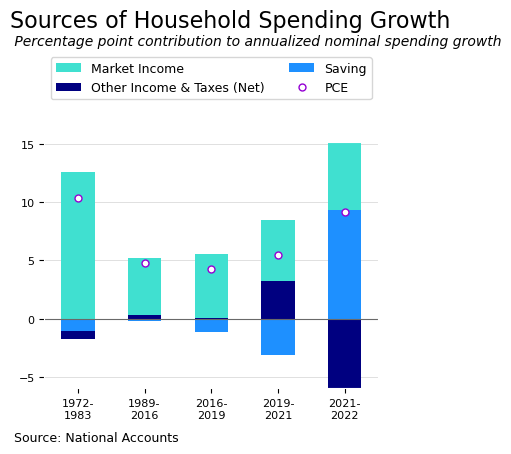

In [76]:
colors=['dodgerblue', 'navy', 'turquoise', 'darkviolet']
fig, ax = plt.subplots(figsize=(4, 3))
plt.tight_layout()
yticks = [-5, 0, 5, 10, 15]
dft.T[slist2].plot(kind='bar', stacked=True, ax=ax, 
                      legend=False, color=colors[:-1])
dft.T['PCE'].plot(marker='.', ax=ax, markersize=10,
                      mec='darkviolet',
                      color='white', ls='')
ax.set_ylim(-6.0, 15.2)
ax.axhline(0, color='dimgray', lw=0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=0)
for xv in yticks:
    ax.axhline(xv, color='lightgray', lw=0.5, zorder=0)
ax.set_yticks(yticks)
handles, labels = ax.get_legend_handles_labels()
ax.legend(reversed(handles), reversed(labels), 
           bbox_to_anchor=(1.0, 1.37), ncol=2)
title = ('Sources of Household Spending Growth')
subtitle = (f' Percentage point contribution to annualized nominal '+
            'spending growth')
fig.text(0.02, 1.32, title, fontsize=16)
fig.text(0.02, 1.26, subtitle, fontsize=10, style='italic')
footer = ('Source: National Accounts')
fig.text(0.03, -0.06, footer, fontsize=9)
plt.savefig('summary2.png', bbox_inches='tight')
plt.show()